# Importing packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Defining functions for kNN classifier

In [2]:
def knn_on_object(x, k:int, features, labels, n_class):
    n_objects = features.shape[0]
    distances = []
    for i in range(n_objects):
            distances.append((np.linalg.norm(features[i] - x), i))            
    distances.sort(key = lambda d: d[0])
    class_vote = np.zeros(n_class, )
    for i in range(k):
        class_vote[int(labels[distances[i][1]])] += 1
    max_class = np.argmax(class_vote)
    return max_class

In [3]:
def knn_err_on_set(k:int, test_features, test_labels, features, labels, n_class):
    n_objects = test_features.shape[0]
    err = 0
    for i in range(n_objects):
        label = test_labels[i]
        feature = test_features[i]
        if int(label) != knn_on_object(feature, k, features, labels, n_class):
            err += 1
    return err

# Defining functions for Parzen–Rosenblatt window classifier

In [4]:
def parzen_kernel(t):
    return 1.01-t

In [5]:
def parzen_window_on_object(x, k:int, features, labels, n_class):
    n_objects = features.shape[0]
    distances = []
    for i in range(n_objects):
        distances.append((np.linalg.norm(features[i] - x), i))            
    distances.sort(key = lambda d: d[0])
    h = distances[k-1][0]
    class_vote = np.zeros(n_class, )
    for i in range(k):
        curr_label = int(labels[distances[i][1]])
        curr_dist = distances[i][0]
        class_vote[curr_label] += parzen_kernel(curr_dist/h)
    max_class = np.argmax(class_vote)
    return max_class

In [6]:
def parzen_window_err_on_set(k:int, test_features, test_labels, features, labels, n_class):
    n_objects = test_features.shape[0]
    err = 0
    for i in range(n_objects):
        feature = test_features[i]
        label = labels[i]
        if int(label) != parzen_window_on_object(feature, k, features, labels, n_class):
            err += 1
    return err

# Binary classification

## Reading and Normalizing Data

In [7]:
def extract_data(filename):
    data = np.loadtxt(filename)
    labels = data[:, 0]
    features = data[:, np.arange(1, data.shape[1])]
    mean_features = np.mean(features, axis=0)
    rev_std_features = [1.0/x for x in np.std(features, axis=0)]
    features = np.array([np.multiply(x - mean_features, rev_std_features) for x in features])
    return features, labels

In [8]:
features, labels = extract_data('logreg_data_binary.txt')
test_features, test_labels = extract_data('test_data_binary.txt')

## kNN

In [9]:
K_max = 99
errors_knn_bin = np.zeros(K_max, )
for i in range(1, K_max + 1):
    errors_knn_bin[i-1] = knn_err_on_set(i, test_features, test_labels, features, labels, 2)

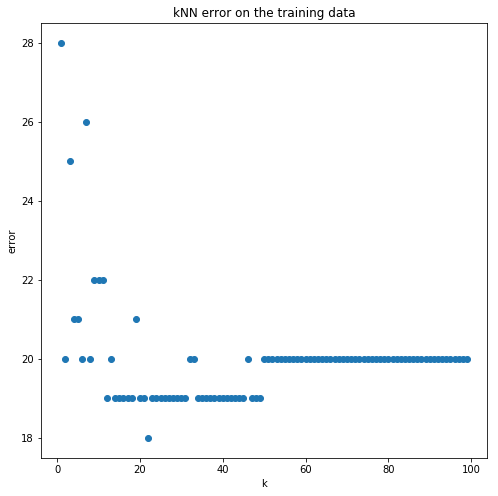

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(np.arange(1, K_max+1), errors_knn_bin)
plt.ylabel("error")
plt.xlabel("k")
plt.title("kNN error on the training data")
plt.savefig("kNN-bin.eps")

In [12]:
optimal_k_knn_bin = np.argmin(errors_knn_bin) + 1
print("Optimal k is", optimal_k_knn_bin)
print("Number of correctly predicted objects is", int(test_features.shape[0]-errors_knn_bin[optimal_k_knn_bin-1]), "out of",
      test_features.shape[0] )

Optimal k is 22
Number of correctly predicted objects is 52 out of 70


## Determining optimal k in PR window method

In [13]:
K_max = 99
errors_pr_bin = np.zeros(K_max, )
for i in range(1, K_max + 1):
    errors_pr_bin[i-1] = parzen_window_err_on_set(i, test_features, test_labels, features, labels, 2)

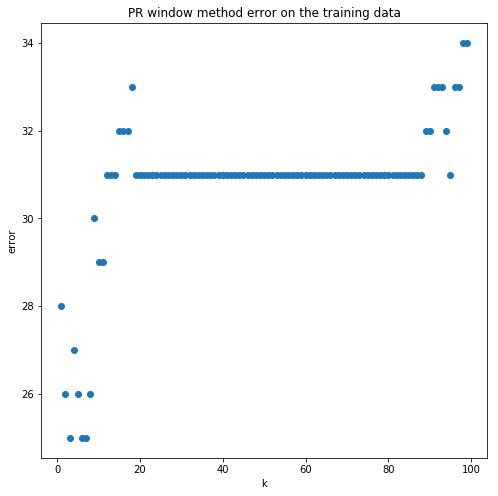

In [14]:
plt.figure(figsize = (8,8))
plt.scatter(np.arange(1, K_max+1), errors_pr_bin)
plt.ylabel("error")
plt.xlabel("k")
plt.title("PR window method error on the training data")
plt.savefig("pr_bin.eps")

In [15]:
optimal_k_pr_bin = np.argmin(errors_pr_bin) + 1
print("Optimal k is", optimal_k_pr_bin)
print("Number of correctly predicted objects is", int(test_features.shape[0]-errors_pr_bin[optimal_k_pr_bin-1]), "out of",
      test_features.shape[0] )

Optimal k is 3
Number of correctly predicted objects is 45 out of 70


# 3 class

## Reading and Normalizing Data

In [16]:
features, labels = extract_data('logreg_data_3class.txt')
test_features, test_labels = extract_data('test_data_3class.txt')

## Determining optimal k in kNN

In [17]:
K_max = 119
errors_knn_mclass = np.zeros(K_max, )
for i in range(1, K_max + 1):
    errors_knn_mclass[i-1] = knn_err_on_set(i, test_features, test_labels, features, labels, 3)

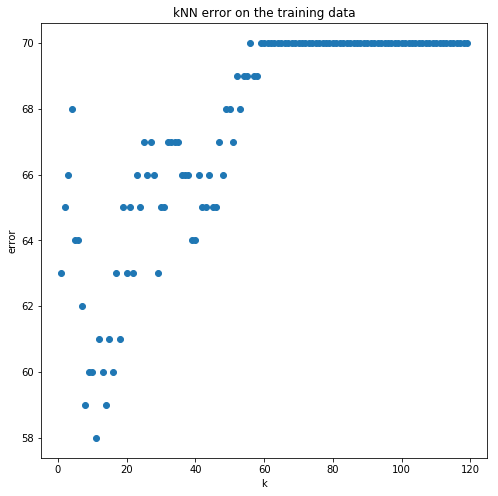

In [18]:
plt.figure(figsize = (8,8))
plt.scatter(np.arange(1, K_max+1), errors_knn_mclass)
plt.ylabel("error")
plt.xlabel("k")
plt.title("kNN error on the training data")
plt.savefig("kNN-mclass.eps")

In [19]:
optimal_k_knn_mclass = np.argmin(errors_knn_mclass) + 1
print("Optimal k is", optimal_k_knn_mclass)
print("Number of correctly predicted objects is", int(test_features.shape[0]-errors_knn_mclass[optimal_k_knn_mclass-1]), "out of",
      test_features.shape[0] )

Optimal k is 11
Number of correctly predicted objects is 62 out of 120


## Determining optimal k in PR window method

In [20]:
K_max = 119
errors_pr_mclass = np.zeros(K_max, )
for i in range(1, K_max + 1):
    errors_pr_mclass[i-1] = parzen_window_err_on_set(i, test_features, test_labels, features, labels, 3)

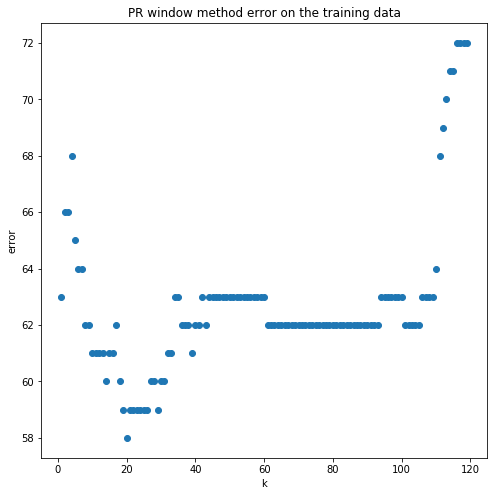

In [21]:
plt.figure(figsize = (8,8))
plt.scatter(np.arange(1, K_max+1), errors_pr_mclass)
plt.ylabel("error")
plt.xlabel("k")
plt.title("PR window method error on the training data")
plt.savefig("pr_mclass.eps")

In [22]:
optimal_k_pr_mclass = np.argmin(errors_pr_mclass) + 1
print("Optimal k is", optimal_k_pr_mclass)
print("Number of correctly predicted objects is", int(test_features.shape[0]-errors_pr_mclass[optimal_k_pr_mclass-1]), "out of",
      test_features.shape[0] )

Optimal k is 20
Number of correctly predicted objects is 62 out of 120
